
# Project: European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> European Soccer match has a top level and may be the most exciting soccer match in the world. There are many European national teams qualifying for the World Cup every time. At the same time a lot of football players are playing for different teams in Europe. Though it is dramatic to watch a match, it is also enjoyable to analyze these teams and players.

**Question 1**: In 2015/2016 season, which league has the most mean goals? Which teams have the most mean scores respectively？What about mean fumbles?  

**Question 2**: What is the win rate for the best team that ranks first in England Premier League, Germany 1. Bundesliga, Italy Serie A and Spain LIGA BBVA in 2015/2016 season separately？  

**Question 3**: What is the difference between fastest team and the mean team attributes?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> At the beginning, I convert the database.sqilte to csv files according to the table and we get nine files. Let's see them in details. I will skip over some simply files.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_country = pd.read_csv('./data/Country.csv')
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
df_league = pd.read_csv('./data/League.csv')
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [4]:
df_player = pd.read_csv('./data/Player.csv')
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [5]:
sum(df_player.duplicated())

0

There are 11060 players and no any duplicated or null elements. This data is clean.

In [6]:
df_player_attributes = pd.read_csv('./data/Player_Attributes.csv')
print(df_player_attributes.shape)
print(sum(df_player_attributes.duplicated()))
df_player_attributes.isnull().sum()

(183978, 42)
0


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

The player attributes have 183978 rows and up to over 3000 null parts. We will remove the null parts. It has little effects on the whole data.

In [8]:
df_team = pd.read_csv('./data/Team.csv')
df_team.info()
print(df_team.duplicated().sum())
print(df_team.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
0
   id  team_api_id  team_fifa_api_id team_long_name team_short_name
0   1         9987             673.0       KRC Genk             GEN
1   2         9993             675.0   Beerschot AC             BAC


In [14]:
df_team_attributes = pd.read_csv('./data/Team_Attributes.csv')
print(df_team_attributes.info())
print(df_team_attributes.duplicated().sum())
df_team_attributes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


From the above data, we can see there are only less than 500 non-null buildUpPlayDribbling data in more than 1400 rows. Further more, when buildUpPlayDribbling is NaN, the buildUpPlayDribblingClass is Little. We can guess there may be some relations. Let's continue to see the Match file.

In [9]:
df_match = pd.read_csv('./data/Match.csv')
print(df_match.info())
df_match.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


We can see the details in it.

In [10]:
df_match['season'].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [11]:
df_match['league_id'].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [12]:
df_match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

In [13]:
sum(df_match['goal'].isnull())

11762

There are more than 100 columns with over 25000 entries in Match data. And nearly half of the 'goal' attribute is null. We can do research on some key columns. 

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# First Let's drop the null values in player_attributes
df_player_attributes.dropna(inplace=True);
df_player_attributes.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

Now this data is OK. Let's check our guess on team_attribute. We have found some null values before.

In [15]:
# see all the buildUpPlayDribblingClass values and what value is null
print(df_team_attributes['buildUpPlayDribblingClass'].unique())
df_team_attributes[df_team_attributes['buildUpPlayDribbling'].isnull()]['buildUpPlayDribblingClass'].unique()

['Little' 'Normal' 'Lots']


array(['Little'], dtype=object)

In [21]:
# see the details
df_team_attributes[df_team_attributes['buildUpPlayDribblingClass'] == 'Little']['buildUpPlayDribbling'].unique()

array([nan, 32., 30., 29., 24., 31., 33., 28., 26., 27.])

In [17]:
df_team_attributes[df_team_attributes['buildUpPlayDribblingClass'] == 'Normal']['buildUpPlayDribbling'].unique()

array([48., 41., 64., 57., 53., 47., 40., 43., 46., 61., 49., 66., 51.,
       37., 45., 52., 50., 38., 55., 35., 63., 34., 39., 60., 44., 36.,
       56., 54., 59., 58., 42., 62., 65.])

In [18]:
df_team_attributes[df_team_attributes['buildUpPlayDribblingClass'] == 'Lots']['buildUpPlayDribbling'].unique()

array([70., 69., 67., 77., 68., 71., 74.])

Now our guess is true. When buildUpPlayDribblingClass is Little, the buildUpPlayDribbling is NaN. We can consider use the mean value to take place of the NaN values.

In [22]:
print(df_team_attributes.query('buildUpPlayDribblingClass == "Normal"')['buildUpPlayDribbling'].min())
mean_buildUpPlayDribbling = df_team_attributes.query('buildUpPlayDribblingClass == "Little"')['buildUpPlayDribbling'].mean()

34.0


In [23]:
# use the mean value to fill and check it
df_team_attributes.fillna(mean_buildUpPlayDribbling, inplace=True)
df_team_attributes['buildUpPlayDribbling'].isnull().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: In 2015/2016 season, which league has the most mean goals? Which teams have the most mean scores respectively？ What about mean fumbles?

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

def get_league_data(df, league_id, season):
    """ get one league data by league_id and season from Match file
    """
    columns = ['id', 'league_id', 'season', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']
    df_match = df[(df['league_id'] == league_id) & (df['season'] == season)]
    return df_match.loc[:, columns]

In [564]:
def process_float(data):
    return float("{0:.2f}".format(data))

In [562]:
# get total goals in a league
def get_league_mean_goals(df):
    matches = float(len(df.index))
    total_scores = df['home_team_goal'].sum() + df['away_team_goal'].sum()
    return process_float(total_scores / matches)

In [560]:
def get_team_mean_goals(df):
    """find the most mean goals and the team. Assume they have the same number of matches
    """
    # For the team_goals, the key is team_id, the value is three-element list.
    # In the list, the first element is goals, the second element is fumbles, the third is number of matches
    team_goals = {}
    for row in df.itertuples():
        home_team = row[5]
        away_team = row[6]
        home_team_goal = row[7]
        away_team_goal = row[8]

        if team_goals.get(home_team) is None:
            team_goals[home_team] = [0] * 3
            team_goals[home_team][0] = home_team_goal
            team_goals[home_team][1] = away_team_goal
            team_goals[home_team][2] = 1
        else:
            team_goals[home_team][0] += home_team_goal
            team_goals[home_team][1] += away_team_goal
            team_goals[home_team][2] += 1

        if team_goals.get(away_team) is None:
            team_goals[away_team] = [0] * 3
            team_goals[away_team][0] = away_team_goal
            team_goals[away_team][1] += home_team_goal
            team_goals[away_team][2] = 1
        else:
            team_goals[away_team][0] += away_team_goal
            team_goals[away_team][1] += home_team_goal
            team_goals[away_team][2] += 1
    team_goals = sorted(team_goals.items(), key=lambda d: d[1][0], reverse=True)
    max_goals_team = team_goals[0][0]
    goals = team_goals[0][1][0]
    fumbles = team_goals[0][1][1]
    matches = float(team_goals[0][1][2])
    max_mean_goals = process_float(goals / matches)
    mean_fumbles = process_float(fumbles / matches)
    return max_goals_team, max_mean_goals, mean_fumbles

In [29]:
def plot_goals_bar(league_list, league_goals_list, team_list, team_goals_list, team_fumbles_list):
    fig = plt.figure(figsize=(12, 6))
    l = len(league_list)
    ind = np.arange(l)
    league_list = [league_list[i] + "\n" + str(team_list[i]) for i in range(l)]
    league = fig.add_subplot(111)
    team = league.twinx()
    
    league.set_ylim(2.0, 3.2)
    team.set_ylim(0, 4)
    league.set_xlabel('Country', fontsize=12)
    league.set_ylabel('League Mean Goals', fontsize=12)
    team.set_ylabel('Top Team Mean Goals and Fumbles', fontsize=12)
    league.bar(ind, league_goals_list)
    plt.xticks(ind, league_list)
    p1 = plt.plot(ind, team_goals_list, 'bo', ind, team_goals_list, 'k', color='g')
    p2 = plt.plot(ind, team_fumbles_list, 'bo', ind, team_fumbles_list, 'k', color='r')
    
    plt.legend((p1[0], p2[0]), ('goals', "fumbles"), loc=9)
    plt.show()

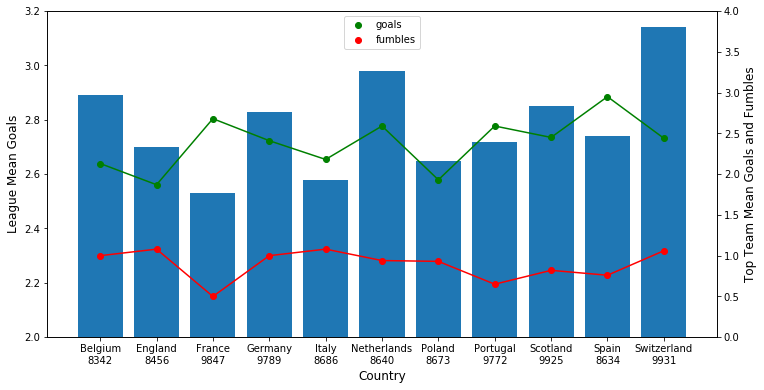

In [563]:
# plot the league data in 2015/2016 season
league_id_list = list(df_league['id'])
season = '2015/2016'
league_country_list = []
league_mean_goals_list = []
team_list = []
team_goals_list = []
team_fumbles_list = []
for league_id in league_id_list:
    league = df_league[df_league['id'] == league_id]
    # mean_goals-country
    league_country = str(league['name']).split()[1]
    league_country_list.append(league_country)
    
    df_league_data = get_league_data(df_match, league_id, season)
    league_mean_goals = get_league_mean_goals(df_league_data)
    league_mean_goals_list.append(league_mean_goals)

    team, goals, fumbles = get_team_mean_goals(df_league_data)
    team_list.append(team)
    team_goals_list.append(goals)
    team_fumbles_list.append(fumbles)
plot_goals_bar(league_country_list, league_mean_goals_list, team_list, team_goals_list, team_fumbles_list)


The xlabel is the league country and its best team id. The left yaxis is the the bar data and right yaxis is the line data.

### Question 2: What is the win rate for the best team that ranks first in England Premier League, Germany 1. Bundesliga, Italy Serie A and Spain LIGA BBVA in 2015/2016 season separately？

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [31]:
# get points according to the rule three points for a win
# https://en.wikipedia.org/wiki/Three_points_for_a_win
def get_best_team_result(df):
    """ get team and win rate, tie rate, lose rate
    """
    team_points = {}
    for row in df.itertuples():
        home_team = row[8]
        away_team = row[9]
        home_team_goal = row[10]
        away_team_goal = row[11]
        result = home_team_goal - away_team_goal

        # this four-element list means numbers of win, tie, lose and total points
        if team_points.get(home_team) is None:
            home_team_result = [0] * 4
            team_points[home_team] = home_team_result
        if team_points.get(away_team) is None:
            away_team_result = [0] * 4
            team_points[away_team] = away_team_result

        # home win
        if result > 0:
            team_points[home_team][0] += 1
            team_points[away_team][2] += 1
        # tie
        elif result == 0:
            team_points[home_team][1] += 1
            team_points[away_team][1] += 1
        # away win
        else:
            team_points[away_team][0] += 1
            team_points[home_team][2] += 1

    for team in team_points.keys():
        team_points[team][3] = 3 * team_points[team][0] + team_points[team][1]

    team_points = sorted(team_points.items(), key=lambda d: d[1][3], reverse=True)
    matches = team_points[0][1][0] + team_points[0][1][1] + team_points[0][1][2]
    # win rate, tie rate, lose rate
    win_rate = get_percentage(team_points[0][1][0] / matches)
    tie_rate = get_percentage(team_points[0][1][1] / matches)
    lose_rate = get_percentage(team_points[0][1][2] / matches)
    return {team_points[0][0]: [win_rate, tie_rate, lose_rate]}

In [32]:
def plot_team_line(team_list, win_list, tie_list, lose_list):
    # fig = plt.figure(figsize=(12, 6))
    ind = np.arange(len(team_list))
    win_list = np.array(win_list)
    tie_list = np.array(tie_list)
    lose_list = np.array(lose_list)
    p1 = plt.bar(ind, lose_list, width=0.5, color='r')
    p2 = plt.bar(ind, tie_list, width=0.5, bottom=lose_list, color='b')
    p3 = plt.bar(ind, win_list, width=0.5, bottom=tie_list+lose_list, color='g')
    plt.ylim([0, 1])
    plt.legend((p1[0], p2[0], p3[0]), ('lose', 'tie', 'win'), loc=1)
    plt.xticks(ind, team_list)
    plt.show()

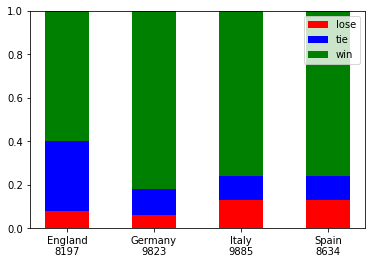

In [34]:
# England, Germany, Italy, Spain League
df_team_attribute = pd.read_csv('./data/Team_Attributes.csv')
leagues_list = {1729: 'England', 7809: 'Germany', 10257: 'Italy', 21518: 'Spain'}
best_teams = []
team_list = []
win_list = []
tie_list = []
lose_list = []
for league_id in leagues_list.keys():
    df_league_match = df_match[(df_match['season'] == season) & (df_match['league_id'] == league_id)]
    best_team = get_best_team_result(df_league_match)
    key = leagues_list[league_id] + "\n" + str(list(best_team.keys())[0])
    team_list.append(key)
    value = list(best_team.values())
    win_list.append(value[0][0])
    tie_list.append(value[0][1])
    lose_list.append(value[0][2])
plot_team_line(team_list, win_list, tie_list, lose_list)


### Question 3: What is the difference between fastest team and the mean team attributes?

In [35]:
def plot_team_attributes(mean_team_attribute, fastest_team_attribute):
    ind = np.arange(len(mean_team_attribute))
    plt.figure(figsize=(14, 6))
    p1 = plt.plot(ind, mean_team_attribute, 'bo', ind, mean_team_attribute, 'k', color='g')
    p2 = plt.plot(ind, fastest_team_attribute, 'bo', ind, fastest_team_attribute, 'k', color='b')
    plt.legend((p1[0], p2[0]), ('Mean', 'Fast'))
    plt.xticks(ind, new_labels)
    plt.xlabel('Team Attributes', fontsize=12, weight='bold')
    plt.ylabel('Index', fontsize=12, weight='bold')
    plt.show()

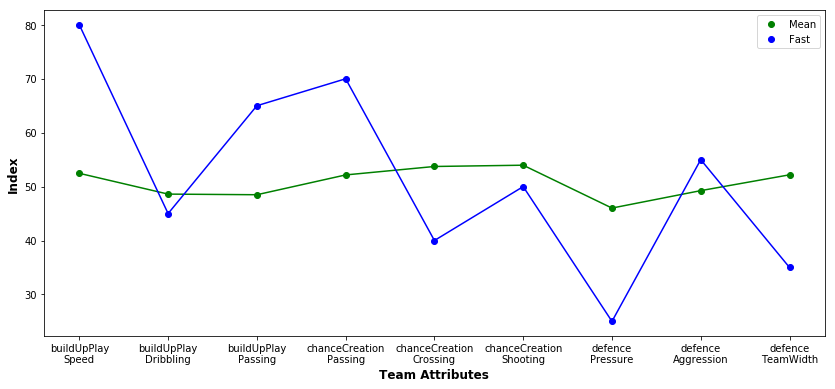

In [36]:
# choose some columns and rename them
new_labels = ['buildUpPlay\nSpeed', 'buildUpPlay\nDribbling', 'buildUpPlay\nPassing',
              'chanceCreation\nPassing', 'chanceCreation\nCrossing', 'chanceCreation\nShooting',
              'defence\nPressure', 'defence\nAggression', 'defence\nTeamWidth']
df_team_attribute = df_team_attribute.iloc[:, np.r_[4, 6, 8, 11, 13, 15, 18, 20, 22]]
df_team_attribute.columns = new_labels
mean_team_attributes = df_team_attribute.mean()
fastest_team_mean_attributes = df_team_attribute[
    df_team_attribute['buildUpPlay\nSpeed'] == df_team_attribute['buildUpPlay\nSpeed'].max()].mean()
plot_team_attributes(mean_team_attributes, fastest_team_mean_attributes) 

<a id='conclusions'></a>
## Conclusions

In all the leagues, Switzerland has the most mean goals. There are more three goals per match. For all their most-goals teams, Spain team 8634 has the highest mean goals, also nearly three goals per match. The France team 9847 followed it, but has the lowest fumbles, about 0.5, which indicates it has a good balance between attacking and defending.

For England, Germany, Italy, Spain four Leagues, Germany team 9823 has highest win rate over 80% and lowest lose rate in 2015/2016 season. England team 8197 has lowest win rate and highest tie rate. It is a little conservative in these four teams.

For the buildUpPlaySpeed fastest team, compared with mean team attributes, it has much higher passing no matter buildUpPlayPass or chanceCreationPassing, and lower chanceCreation in crossing and shooting, and much lower defencePressure.